# Mini capstone project : crime data Analysis with mysql and python

In [1]:
import pymysql
#This imports the PyMySQL library import pymysql

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
#i have imported all the required librates such as pandas, numpy,seadorn ,matpoltlib.

In [3]:
connection=pymysql.connect(host='localhost',user='root',password='tan23ch@#',database='MY_FIRST_PROJECT')
#This line establishes a connection to the MySQL database server

In [4]:
query='select * from crime_data'

In [5]:
crime_data=pd.read_sql(query,connection)
#This function is part of the Pandas library and is used to execute a SQL query and read the results into a DataFrame.

C:\Users\tanma\AppData\Local\Temp\ipykernel_233632\2376596217.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  crime_data=pd.read_sql(query,connection)


In [6]:
crime_data

,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
0,10304468,01-08-2020,01-08-2020,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.30
1,190101086,01-02-2020,01-01-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,700 S HILL ST,34.05,-118.25
2,191501505,01-01-2020,01-01-2020,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.40
3,191921269,01-01-2020,01-01-2020,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,BEAUTY SUPPLY STORE,IC,14400 TITUS ST,34.22,-118.45
4,200100502,01-02-2020,01-02-2020,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,DEPARTMENT STORE,IC,700 S FIGUEROA ST,34.05,-118.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,200106614,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,33,M,SIDEWALK,IC,2400 ELLENDALE PL,34.05,-118.26
495,200106615,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,39TH PL,34.05,-118.26
496,200106616,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,35,M,OTHER STORE,IC,2500 W VERNON AV,34.05,-118.25
497,200106617,02-07-2020,01-10-2020,Central,510,VEHICLE - STOLEN,0,F,PARKING LOT,IC,700 EXPOSITION BL,34.05,-118.25


In [7]:
crime_data.info()
#Given the data set information


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DR_NO        499 non-null    int64  
 1   Date_Rptd    499 non-null    object 
 2   DATE_OCC     499 non-null    object 
 3   AREA_NAME    499 non-null    object 
 4   Crm_Cd       499 non-null    int64  
 5   Crm_Cd_Desc  499 non-null    object 
 6   Vict_Age     499 non-null    int64  
 7   Vict_Sex     499 non-null    object 
 8   Premis_Desc  499 non-null    object 
 9   Status       499 non-null    object 
 10  Location     499 non-null    object 
 11  LAT          499 non-null    float64
 12  LON          499 non-null    float64
dtypes: float64(2), int64(3), object(8)
memory usage: 50.8+ KB


In [8]:
crime_data.head()

,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
0,10304468,01-08-2020,01-08-2020,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.30
1,190101086,01-02-2020,01-01-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,700 S HILL ST,34.05,-118.25
2,191501505,01-01-2020,01-01-2020,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.40
3,191921269,01-01-2020,01-01-2020,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,BEAUTY SUPPLY STORE,IC,14400 TITUS ST,34.22,-118.45
4,200100502,01-02-2020,01-02-2020,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,DEPARTMENT STORE,IC,700 S FIGUEROA ST,34.05,-118.26


In [9]:
crime_data.shape
#The size of the crime data is 499,13.13 columns and 499 rows


(499, 13)

In [10]:
crime_data.size

6487

In [11]:
crime_data.isna()

,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,False,False,False,False,False,False,False,False,False,False,False,False,False
495,False,False,False,False,False,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
crime_data.isnull().sum()
#No null values available


DR_NO          0
Date_Rptd      0
DATE_OCC       0
AREA_NAME      0
Crm_Cd         0
Crm_Cd_Desc    0
Vict_Age       0
Vict_Sex       0
Premis_Desc    0
Status         0
Location       0
LAT            0
LON            0
dtype: int64

In [13]:
crime_data.describe()

,DR_NO,Crm_Cd,Vict_Age,LAT,LON
count,4.990000e+02,499.000000,499.000000,499.000000,499.000000
mean,1.999930e+08,504.178357,32.142285,34.047335,-118.261283
std,8.742243e+06,198.381863,20.202136,0.053840,0.041560
min,1.030447e+07,210.000000,0.000000,33.710000,-118.560000
25%,2.001044e+08,330.000000,23.000000,34.040000,-118.260000
50%,2.001048e+08,442.000000,31.000000,34.050000,-118.250000
75%,2.001064e+08,624.000000,46.500000,34.050000,-118.240000
max,2.220130e+08,956.000000,78.000000,34.280000,-118.190000


In [14]:
#what is the distribution of reported crime base on crime code?

In [15]:
crime_distribution =crime_data.groupby('Crm_Cd').count()
crime_distribution

,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
Crm_Cd,,,,,,,,,,,,
210,12,12,12,12,12,12,12,12,12,12,12,12
220,4,4,4,4,4,4,4,4,4,4,4,4
230,24,24,24,24,24,24,24,24,24,24,24,24
310,16,16,16,16,16,16,16,16,16,16,16,16
320,2,2,2,2,2,2,2,2,2,2,2,2
330,82,82,82,82,82,82,82,82,82,82,82,82
341,26,26,26,26,26,26,26,26,26,26,26,26
343,1,1,1,1,1,1,1,1,1,1,1,1
350,9,9,9,9,9,9,9,9,9,9,9,9


<Figure size 1000x600 with 0 Axes>

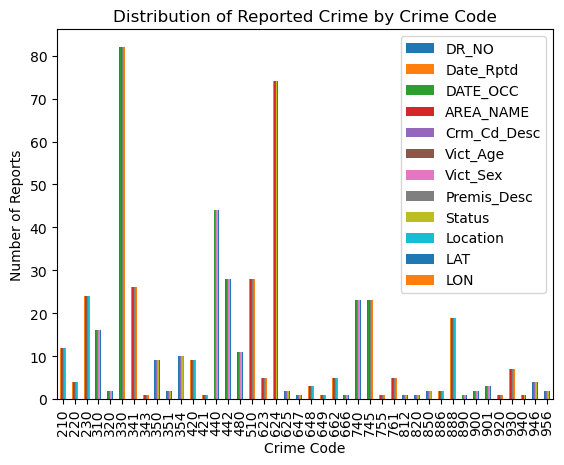

In [16]:
plt.figure(figsize=(10, 6))
crime_distribution.plot(kind='bar')
plt.xlabel('Crime Code')
plt.ylabel('Number of Reports')
plt.title('Distribution of Reported Crime by Crime Code')
plt.show()


In [17]:
crime_data

,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
0,10304468,01-08-2020,01-08-2020,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.30
1,190101086,01-02-2020,01-01-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,700 S HILL ST,34.05,-118.25
2,191501505,01-01-2020,01-01-2020,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.40
3,191921269,01-01-2020,01-01-2020,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,BEAUTY SUPPLY STORE,IC,14400 TITUS ST,34.22,-118.45
4,200100502,01-02-2020,01-02-2020,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,DEPARTMENT STORE,IC,700 S FIGUEROA ST,34.05,-118.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,200106614,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,33,M,SIDEWALK,IC,2400 ELLENDALE PL,34.05,-118.26
495,200106615,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,39TH PL,34.05,-118.26
496,200106616,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,35,M,OTHER STORE,IC,2500 W VERNON AV,34.05,-118.25
497,200106617,02-07-2020,01-10-2020,Central,510,VEHICLE - STOLEN,0,F,PARKING LOT,IC,700 EXPOSITION BL,34.05,-118.25


In [18]:
query='select * from crime_data'

In [19]:
crime_data=pd.read_sql(query,connection)

C:\Users\tanma\AppData\Local\Temp\ipykernel_233632\1685295256.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  crime_data=pd.read_sql(query,connection)


In [20]:
crime_data

,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
0,10304468,01-08-2020,01-08-2020,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.30
1,190101086,01-02-2020,01-01-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,700 S HILL ST,34.05,-118.25
2,191501505,01-01-2020,01-01-2020,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.40
3,191921269,01-01-2020,01-01-2020,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,BEAUTY SUPPLY STORE,IC,14400 TITUS ST,34.22,-118.45
4,200100502,01-02-2020,01-02-2020,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,DEPARTMENT STORE,IC,700 S FIGUEROA ST,34.05,-118.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,200106614,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,33,M,SIDEWALK,IC,2400 ELLENDALE PL,34.05,-118.26
495,200106615,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,39TH PL,34.05,-118.26
496,200106616,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,35,M,OTHER STORE,IC,2500 W VERNON AV,34.05,-118.25
497,200106617,02-07-2020,01-10-2020,Central,510,VEHICLE - STOLEN,0,F,PARKING LOT,IC,700 EXPOSITION BL,34.05,-118.25


In [21]:
query=' select Crm_Cd,count(Crm_Cd) as count_crm_cod from crime_data group by crm_Cd '


In [22]:
CD=pd.read_sql(query,connection)

C:\Users\tanma\AppData\Local\Temp\ipykernel_233632\2022110255.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  CD=pd.read_sql(query,connection)


In [23]:
CD

,Crm_Cd,count_crm_cod
0,624,74
1,745,23
2,740,23
3,442,28
4,946,4
5,341,26
6,330,82
7,930,7
8,648,3
9,354,10


In [24]:
count_crm_cod={
    'crm_cod':[330,440,624],
    'count_crm_cod':[82,74,44]
    }

In [25]:
p=pd.DataFrame(count_crm_cod)

In [26]:
p
#TOP 3 crime code 

,crm_cod,count_crm_cod
0,330,82
1,440,74
2,624,44


In [27]:
#is there a significant difference id crime rate between male and female victims?

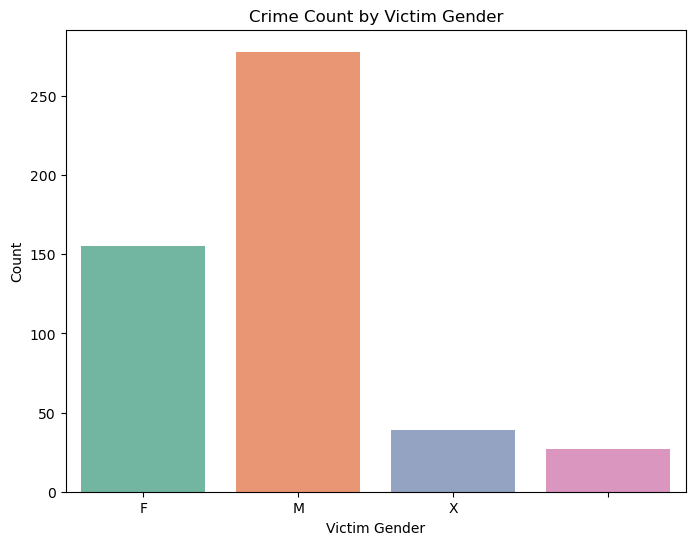

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(data=crime_data, x='Vict_Sex', palette='Set2')
plt.title('Crime Count by Victim Gender')
plt.xlabel('Victim Gender')
plt.ylabel('Count')
plt.show()

In [29]:
query='select Vict_Sex,count(Vict_Sex) as count_of_vict_age from crime_data group by Vict_sex order by count_of_vict_age desc limit 2'

In [30]:
CData=pd.read_sql(query,connection)

C:\Users\tanma\AppData\Local\Temp\ipykernel_233632\1616721816.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  CData=pd.read_sql(query,connection)


In [31]:
CData
#from our count polt we can conclude that the male crime rate is more then female 

,Vict_Sex,count_of_vict_age
0,M,278
1,F,155


In [32]:
#where do most crime occur based on the "LOCATION' column?

In [33]:
location_counts = crime_data ['Location'].value_counts()
location_counts

800 N ALAMEDA ST      14
700 W 7TH ST          11
1100 S FIGUEROA ST     6
300 E 5TH ST           6
6TH                    6
                      ..
14600 VANOWEN ST       1
600 N ALAMEDA ST       1
FLOWER                 1
400 COLYTON ST         1
2600 S FIGUEROA ST     1
Name: Location, Length: 365, dtype: int64

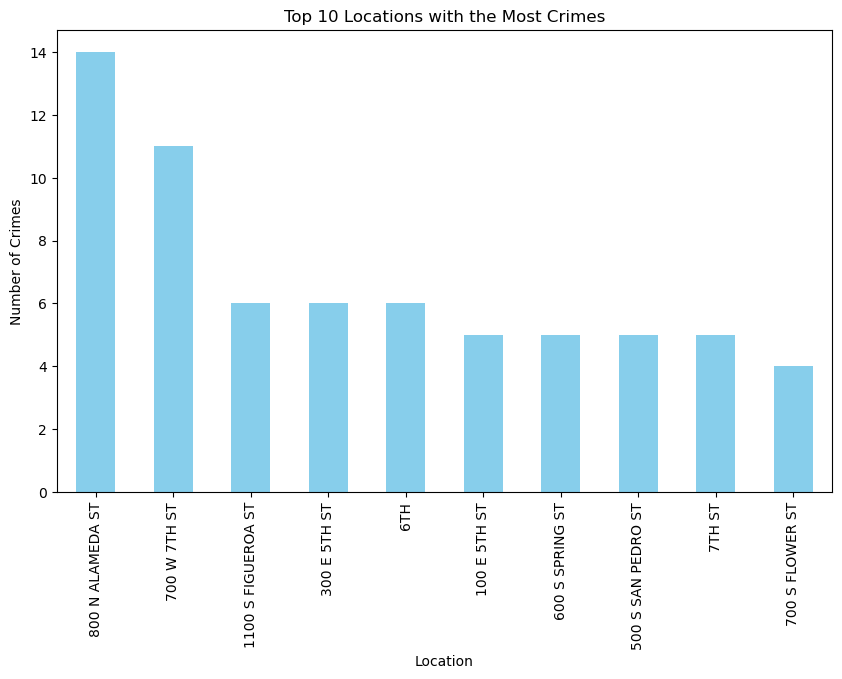

In [34]:
plt.figure(figsize=(10, 6))
location_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Locations with the Most Crimes')
plt.xlabel('Location')
plt.ylabel('Number of Crimes')
plt.show()


In [35]:
#notes==we can know that more crime are occurring in 8000 in Alameda st. and it is follwed by 700 w seventh estate.
#and it is the crime code means which are occurring.

In [36]:
#what is the distribution of victim ages in reported crime?

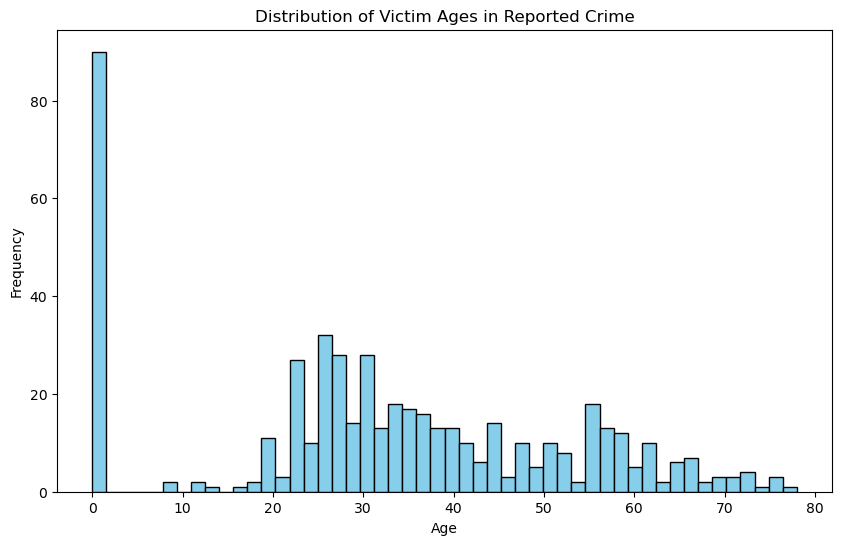

In [37]:
# Plotting the distribution of victim ages
plt.figure(figsize=(10, 6))
plt.hist(crime_data['Vict_Age'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Victim Ages in Reported Crime')
plt.show()


In [38]:
QUERY='select AREA_NAME,count(AREA_NAME) as count_of_AREA_NAME from crime_data GROUP BY AREA_NAME'

In [39]:
AREA_NAME_DATA=pd.read_sql(QUERY,connection)

C:\Users\tanma\AppData\Local\Temp\ipykernel_233632\3445464021.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  AREA_NAME_DATA=pd.read_sql(QUERY,connection)


In [40]:
AREA_NAME_DATA

,AREA_NAME,count_of_AREA_NAME
0,Southwest,4
1,Central,423
2,N Hollywood,2
3,Mission,1
4,Van Nuys,4
5,Wilshire,5
6,Rampart,8
7,Harbor,12
8,Pacific,1
9,Hollenbeck,4


In [41]:
#notes ===This is AREA_NAME_DATA. AREA_NAME IN AREA_NAME_DATA IS 18.The biggest crime_area is central

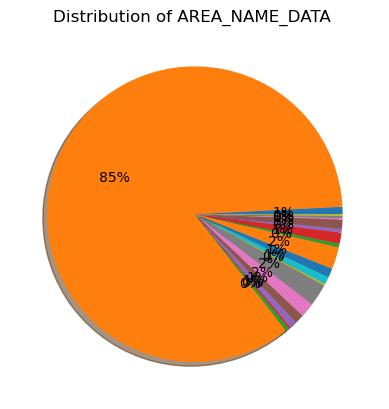

In [42]:
plt.pie(AREA_NAME_DATA.count_of_AREA_NAME,autopct='%1.0f%%',shadow=True,radius=1,labeldistance=1.5)
plt.title ('Distribution of AREA_NAME_DATA ')
plt.show()
